# 1. Data processing and exploratory analysis

### Download and Load ready-to-use data

In [40]:
from pathlib import Path
import sys
import re
import pandas as pd
sys.path.append(str(Path("../../").resolve()))
import scTenifold as st
from scTenifold.data import list_data, fetch_data

### Get datasets from another repo

Download and load the specified dataset if it is not in local directory, otherwise just load the dataset

In [2]:
list_data()

['AD', 'Nkx2_KO', 'aging', 'cetuximab', 'dsRNA', 'morphine']

In [3]:
# get dict of data
AD_datasets = fetch_data("AD")

C:\Users\qwerty239qwe\PycharmProjects\scTenifoldpy\scTenifold\data\_io.py:92: UserWarning: Barcode file is not existed. Added fake barcode name in the dataset
  warn("Barcode file is not existed. Added fake barcode name in the dataset")


creating a (2869, 2423) matrix
creating a (2869, 4561) matrix


In [6]:
AD_datasets["AD"]

,barcode_0,barcode_1,barcode_2,barcode_3,barcode_4,barcode_5,barcode_6,barcode_7,barcode_8,barcode_9,...,barcode_2413,barcode_2414,barcode_2415,barcode_2416,barcode_2417,barcode_2418,barcode_2419,barcode_2420,barcode_2421,barcode_2422
0,,,,,,,,,,,,,,,,,,,,,
0610030E20Rik,0,0,3,3,1,0,0,0,1,0,...,2,1,0,0,0,0,0,0,0,0
1110008P14Rik,1,0,0,2,1,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1110051M20Rik,0,3,0,1,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,1
1700020I14Rik,1,0,1,1,2,1,1,0,2,0,...,3,0,0,0,6,2,0,3,0,0
2010111I01Rik,0,0,0,6,0,0,1,0,0,0,...,2,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zswim8,1,1,0,6,1,0,2,0,2,4,...,0,0,1,0,10,1,1,2,0,0
Zufsp,1,2,2,10,9,1,7,5,1,3,...,3,5,0,0,8,3,3,2,3,7
Zwint,0,1,0,0,1,2,2,0,0,0,...,0,0,2,0,1,0,2,0,0,1


### Use simulated data

In [2]:
from scTenifold.data import get_test_df

In [3]:
sim_data = get_test_df(100, 100)

In [5]:
sim_data.head(10)

,Cell-1,Cell-2,Cell-3,Cell-4,Cell-5,Cell-6,Cell-7,Cell-8,Cell-9,Cell-10,...,Cell-91,Cell-92,Cell-93,Cell-94,Cell-95,Cell-96,Cell-97,Cell-98,Cell-99,Cell-100
MT-1,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
MT-2,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,0
MT-3,0,0,0,0,1,0,1,0,2,0,...,1,1,0,1,0,0,1,1,0,0
MT-4,0,1,0,1,1,1,1,0,0,0,...,0,0,0,2,0,1,0,0,1,0
MT-5,1,0,2,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,2,0,0
MT-6,1,0,0,0,0,0,0,2,0,1,...,0,0,1,0,1,0,1,1,1,1
MT-7,1,0,0,0,0,1,0,1,1,1,...,0,0,1,0,0,1,0,0,2,0
MT-8,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,1,0,0,0
MT-9,0,2,0,2,1,1,1,0,2,0,...,0,0,0,1,0,0,0,1,0,0
MT-10,1,0,2,1,0,1,0,1,0,0,...,0,0,1,1,0,0,3,0,2,1


### Data visualization

In [22]:
from scTenifold.plotting import plot_embedding
import pandas as pd
import numpy as np

In [29]:
# AD = AD_datasets["AD"].rename(columns={c: f"{c}_AD" for c in AD_datasets["AD"].columns})
WT = AD_datasets["WT"].rename(columns={c: f"AD_{i + 1}" if i < 2422 else f"WT_{i - 2421}" for i, c in enumerate(AD_datasets["WT"].columns)})

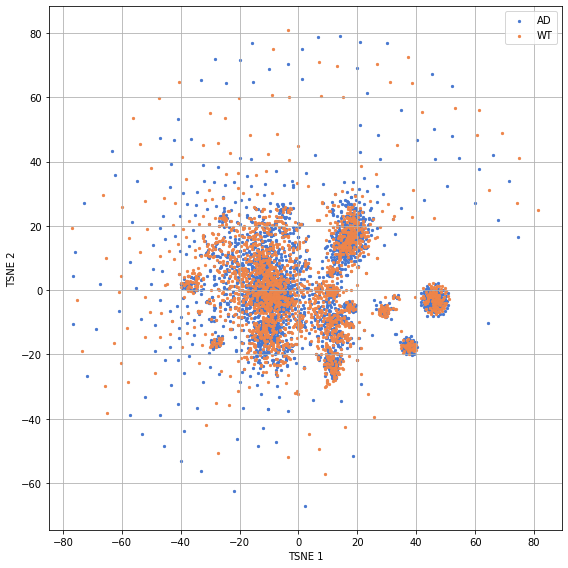

In [34]:
merged = np.log2(WT + 1)

plot_embedding(merged, 
               groups={"AD": WT.columns[WT.columns.str.match("AD")], "WT": WT.columns[WT.columns.str.match("WT")]},
               method="TSNE", size=5)

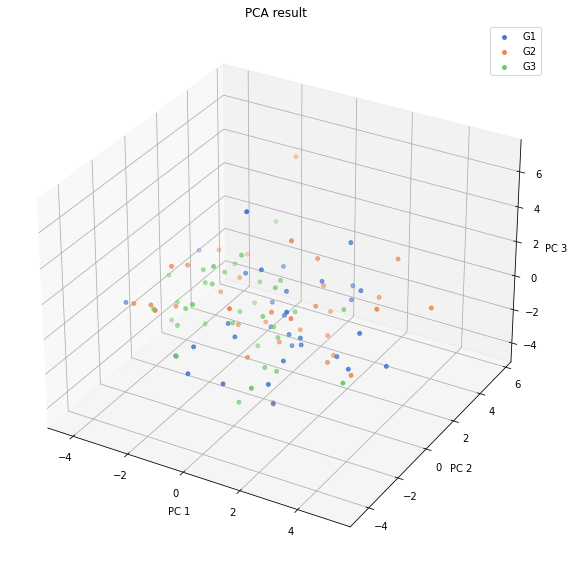

In [6]:
plot_embedding(sim_data, groups={"G1": sim_data.columns.to_list()[:33], 
                                "G2": sim_data.columns.to_list()[33:66],
                                "G3": sim_data.columns.to_list()[66:]},
               method='PCA',
               title="PCA result", size=15, plot_2D=False)

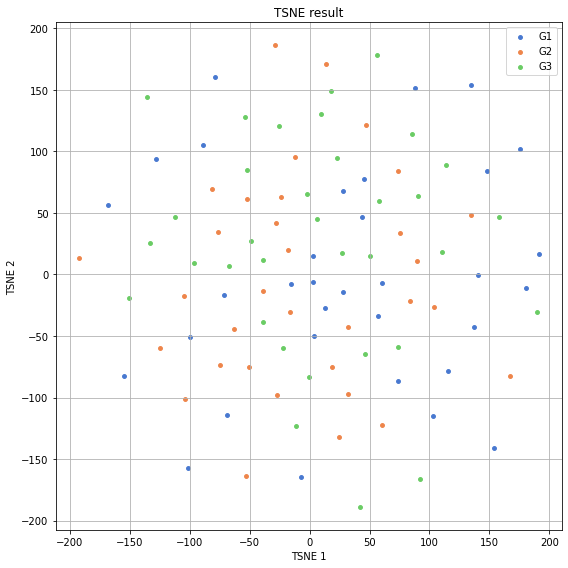

In [10]:
plot_embedding(sim_data, groups={"G1": sim_data.columns.to_list()[:33], 
                                "G2": sim_data.columns.to_list()[33:66],
                                "G3": sim_data.columns.to_list()[66:]},
               method='TSNE',
               title="TSNE result", size=15)

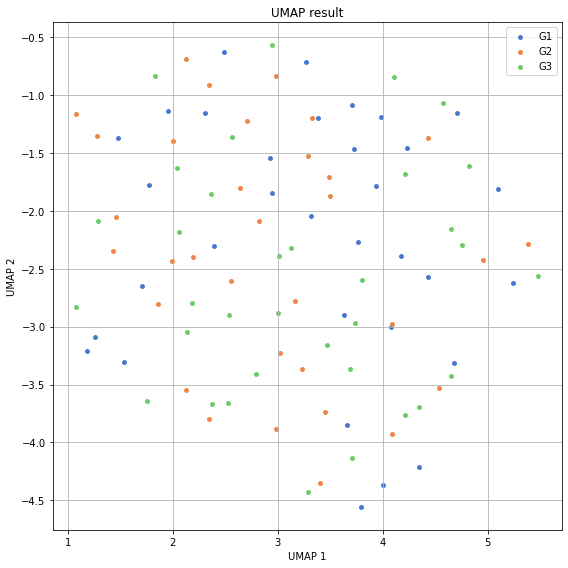

In [9]:
plot_embedding(sim_data, groups={"G1": sim_data.columns.to_list()[:33], 
                                "G2": sim_data.columns.to_list()[33:66],
                                "G3": sim_data.columns.to_list()[66:]},
               method='UMAP',
               title="UMAP result", size=15)